In [1]:
#%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from scipy.ndimage import find_objects
from matplotlib.colors import Normalize
from src.cpm_basic import CellularPottsModel
from src.util import color_code_cells
from collections import defaultdict

In [12]:
n_cells=105
n_types=2 
T=26
L=150
J = 500
J_medium = 500
type_percentages= [1/4, 3/4]  # cell type 1, cell type 2 percentages
adhessions= np.array([[0,        J_medium, J_medium],  
                      [J_medium, J,         300],
                      [J_medium, 300,        J]]) 
volume_coefficient= np.array([0, 1, 1])
perimeter_coefficient= np.array([0, 1, 1])
lattice_type="surrounded_cell"
object_volumes=None # Is default set in the CPM class if none
periodic=False

# for parallel processing
param = {
    "n_cells": n_cells,
    "n_types": n_types,
    "T": T,
    "L": L,
    "type_percentages": type_percentages,
    "adhesions": adhessions,
    "volume_coefficient": volume_coefficient,
    "perimeter_coefficient": perimeter_coefficient,
    "lattice_type": lattice_type,
    "object_volumes": object_volumes,
    "periodic": periodic, 
    "steps": 100_000}


cpm = CellularPottsModel(n_cells=n_cells, n_types=n_types, T=T, L=L, type_percentages=type_percentages,
                        volume_coefficient=volume_coefficient, perimeter_coefficient=0,
                        adhessions=adhessions, lattice_type=lattice_type, object_volumes=object_volumes, periodic=periodic)
grid=cpm.run_a_sim(steps=1_000_000)

100%|██████████| 1000000/1000000 [00:43<00:00, 23062.76it/s]


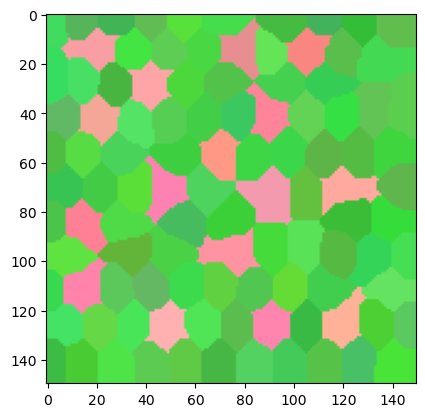

In [13]:
plt.imshow(color_code_cells(grid, cpm.tau))

In [5]:
#a=cpm.run_a_sim(steps=1000000)
#np.save("saves/init_grids/initial_grid.npy", a)